In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('hatch', linewidth=0.05)

In [4]:
# linewidths
lw_main = 1.2
lw_secondary = 0.8
scatter_size = 16
dash_pattern = (4, 5)

In [5]:
def fun1(x):
    #x(x-1)(x-2)
    return 5 * x * (x - 1) * (x - 2)

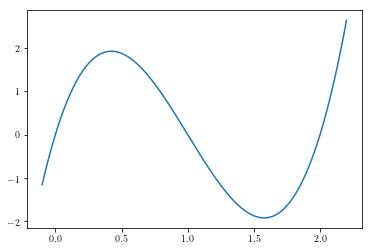

In [6]:
xs = np.linspace(-0.1, 2.2, num=200)
ys = fun1(xs)
plt.plot(xs, ys)

In [7]:
def note(ax, text, x, y, offsetx=0, offsety=0.2, **kwargs):
    ax.annotate(text, (x, y), (x + offsetx, y + offsety), **kwargs)

In [8]:
def vlines(ax, xypts, ymin):
    """
    Plot vertical lines from pt to ymin for each pt=[x,y] in xypts.
    """
    for pt in xypts:
        ax.plot([pt[0], pt[0]], [ymin, pt[1]],
                color='k', linestyle='--', lw=lw_secondary, dashes=(4,5))

In [9]:
def setup_axis(ax, xtickmultiple=1, ytickmultiple=1, showgrid=False):
    """
    Basic formatting of axes.
    """
    ax.set_xticks(list(map(lambda x: x * xtickmultiple, range(-10, 10))))
    ax.set_yticks(list(map(lambda x: x * ytickmultiple, range(-10, 10))))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if showgrid:
        ax.grid(True)
        ax.set_axisbelow(True)
    else:
        ax.grid(False)

In [10]:

def fun1(x):
    #x(x-1)(x-2)
    return 5 * x * (x - 1) * (x - 2)

def lin1(x):
    return -0.8 * x

def fig1():
    """
    A simple figure showing the MVT with two solutions.
    
    f(x) = 5x(x-1)(x-2)
    """
    xlim1 = [-0.2, 2.2]
    ylim1 = [-2.5, 2.2]
    n = 230
    
    fig = plt.figure(figsize=(6, 2.5))
    plt.subplots_adjust(wspace=0.3)
    ax = fig.add_subplot(1, 2, 1)
        
    setup_axis(ax)
    
    # Plot the curve
    xs = np.linspace(*xlim1, num=n)
    ys = fun1(xs)  
    ax.plot(xs, ys, 'k', lw=lw_main)
    
    # Plot two extremal values. Computed externally.
    xsols = [1 - 3**(-0.5), 1 + 3**(-0.5)]
    ysols = list(map(fun1, xsols))
    ax.scatter(xsols, ysols, c='k', s=scatter_size) 

    yzeroes = np.zeros_like(xs)
    ax.plot(xs, yzeroes, color='k', lw=lw_secondary)
   
    a = (0, 0)
    b = (2, 0)
    ax.scatter(*zip(a, b), c='k', s=scatter_size)
    vlines(ax, [a, b] + list(zip(xsols, ysols)), -2.5)
    
    # annotate values
    ABOVE_Y_OFFSET = 0.1     # offset to place value above axis
    BELOW_Y_OFFSET = -0.43   # the offset to place just below axis
    RIGHT_X_OFFSET = .05     # offset to shift right of line

    note(ax, r"$c$", xsols[0], ylim1[0], offsetx=-0.02, offsety=BELOW_Y_OFFSET)
    note(ax, r"$c'$", xsols[1], ylim1[0], offsetx=-0.02, offsety=BELOW_Y_OFFSET)
    note(ax, r"$a$", a[0], -2.5, offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    note(ax, r"$b$", b[0], -2.5, offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    
    ax.set_xlim(xlim1)
    ax.set_ylim(ylim1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f$', rotation=0, labelpad=1)
    #ax.set_aspect(0.5)
    
    
    # Second figure
    ax2 = fig.add_subplot(1, 2, 2)

    setup_axis(ax2)

    ax2.plot(xs, ys, 'k', lw=lw_main)
    
    bprime = (1.8, fun1(1.8))
    x2sols = [0.51, 1.51]
    y2sols = list(map(fun1, x2sols))
    ax2.scatter(*zip(a, bprime), c='k', s=scatter_size)
    
    
    vlines(ax2, [a, bprime] + list(zip(x2sols, y2sols)), -2.5)
    
    y2s = lin1(xs)
    ax2.plot(xs, y2s, color='k', linewidth=lw_secondary)
    ax2.scatter(x2sols, y2sols, c='k', s=scatter_size)
    
    note(ax2, r"$a$", a[0], -2.5, offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    note(ax2, r"$b_{\mathrm{new}}$", bprime[0], -2.5,
         offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    note(ax2, r"$c_{\mathrm{new}}$", x2sols[0], -2.5, offsetx=-0.15, offsety=BELOW_Y_OFFSET)
    note(ax2, r"$c'_{\mathrm{new}}$", x2sols[1], -2.5, offsetx=-0.15, offsety=BELOW_Y_OFFSET)
     
    ax2.set_xlim(xlim1)
    ax2.set_ylim(ylim1)
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$f$', rotation=0, labelpad=1)
    
    fig.savefig("figure1.pdf", bbox_inches='tight')

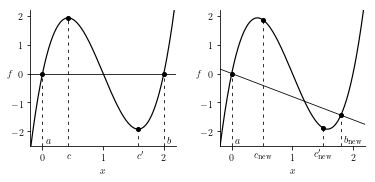

In [11]:
fig1()

In [12]:
def fun2(x):
    # -2x(x-2)
    return -2 * x * (x - 2)

def lin2(x):
    return 0.5 * x

def fig2():
    """
    A downwards parabola and its MVT abscissa plot.
    """
    xlim1 = [-0.1, 3]
    ylim1 = [-5, 2.2]
    
    fig = plt.figure(figsize=(6, 2.5))
    gs = plt.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.25)
    ax = plt.subplot(gs[0])
        
    setup_axis(ax, ytickmultiple=2)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f$', rotation=0)
    
    # Plot the curve
    xs = np.linspace(*xlim1, num=230)
    ys = fun2(xs)  
    ax.plot(xs, ys, 'k', lw=lw_main)
    
    a = (0, 0)
    b0 = (2, 0)
    c0 = (1, 2)
    b1 = (2.6, fun2(2.6))
    c1 = (b1[0]/2, fun2(b1[0]/2))
    b2 = (1.65, fun2(1.65))
    c2 = (b2[0]/2, fun2(b2[0]/2))
    
    def l0(x):
        slope = (b0[1] - 0)/b0[0]
        return x * slope
    def l1(x):
        slope = (b1[1] - 0)/b1[0]
        return x * slope
    def l2(x):
        slope = (b2[1])/b2[0]
        return x * slope
    
    for line_fun in (l0, l1, l2):
        ax.plot(xs, line_fun(xs), color='k', lw=lw_secondary)
    ax.scatter(*zip(a, b0, c0, b1, c1, b2, c2), c='k', s=scatter_size)
    
    ABOVE_Y_OFFSET = 0.1     # offset to place value above axis
    BELOW_Y_OFFSET = -0.43   # the offset to place just below axis
    RIGHT_X_OFFSET = .05     # offset to shift right of line
    LEFT_X_OFFSET = -0.125
    
    note(ax, r"$a_0$", a[0],  ylim1[0], offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    note(ax, r"$b_0$", b0[0], ylim1[0], offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    note(ax, r"$b_1$", b1[0], ylim1[0], offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    note(ax, r"$b_2$", b2[0], ylim1[0], offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    note(ax, r"$c_1$", c1[0], ylim1[0], offsetx=-RIGHT_X_OFFSET, offsety=BELOW_Y_OFFSET)
    note(ax, r"$c_2$", c2[0], ylim1[0], offsetx=-RIGHT_X_OFFSET, offsety=BELOW_Y_OFFSET)
    note(ax, r"$c_0$", c0[0], ylim1[0], offsetx=RIGHT_X_OFFSET, offsety=ABOVE_Y_OFFSET)
    
    vlines(ax, [a, b0, b1, b2, c0, c1, c2], ylim1[0])
    
    ax.set_xlim(xlim1)
    ax.set_ylim(ylim1)
    #ax.set_aspect(0.5)
    

    
    # Second figure
    ax2 = plt.subplot(gs[1])
    
    setup_axis(ax2, xtickmultiple=1, ytickmultiple=1, showgrid=True)
    ax2.set_xlabel(r'$b$')
    ax2.set_ylabel(r'$c$', rotation=0, labelpad=5)

    ys2 = lin2(xs)
    ax2.plot(xs, ys2, color='k', lw=lw_main)
    pts = [(b0[0], c0[0]), (b1[0], c1[0]), (b2[0], c2[0])]
    
    ax2.scatter(*zip(*pts), c='k', s=scatter_size)
    ax2.plot(xs, xs, c='k', lw=lw_secondary)
    ax2.fill_between([0,xlim1[1]], [0,xlim1[1]], xlim1[1]*1.2,
                      facecolor='none', hatch="\\\\\\", edgecolor='k', lw=0)
    
    note(ax2, r"$(b_0, c_0)$", b0[0], c0[0], offsetx=0.125, offsety=-0.15)
    note(ax2, r"$(b_1, c_1)$", b1[0], c1[0], offsetx=0.125, offsety=-0.15)
    note(ax2, r"$(b_2, c_2)$", b2[0], c2[0], offsetx=0.055, offsety=-0.25)
    
    ax2.set_xlim([0, xlim1[1]])
    ax2.set_ylim([0, xlim1[1]*1.2])
    
    fig.savefig("figure2.pdf", bbox_inches='tight')

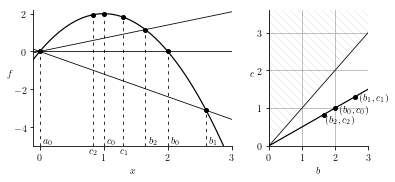

In [13]:
fig2()

In [14]:
from scipy import *
import sympy
from sympy import diff, solve, Symbol, integrate
from sympy.abc import X, B, C, D

Convention: variables in CAPS are sympy objects; lowercase variables are numpy/normal.

In [15]:
def interpolate(args):
    """ Args is a list of the form [(x1,r1,v1),(x2,r2,v2),...]. We then seek a
    polynomial p with minimal degree satisfying p^(r1)(x1) = v1 and so on. """
    n = len(args) # degree of our polynomial
    A = [Symbol("a[%d]" % i) for i in range(n)] # coefficients
    P = sum([A[i]*X**i for i in range(n)]) # the polynomial itself
    EQNS = [diff(P,X,r).subs(X,x)-v for x,r,v in args] # solve these
    SOLN = solve(EQNS,A)
    return P.subs(SOLN)

def smoother_interpolate(args,fudgepoint=2,fudgeorder=1,interval=(0,4)):
    """ Add the additional (fudgepoint,fudgeorder,D) to `args` and then
    choose the parameter D in order to minimize L2 norm of interpolate(args)
    over `interval`."""
    newargs = args + [(fudgepoint,fudgeorder,D)]
    P = interpolate(newargs)
    L2 = sympy.integrate(diff(P,X)**2,(X,*interval))
    SOLN = solve(diff(L2,D),D)[0]
    return P.subs(D,SOLN)

## Now we use interpolate() to get construct families of polynomials to look at

b0,c0 = 3,1 # our favorite values to bifurcate from
basic = [ (0,0,0),(b0,0,0),(c0,0,1),(c0,1,0)] # basic conditions we want


# systematically ask for more degneracy!
def c_degen(n,s):
    """ n is somehow the "order of degeneracy" of the problem at c0=1. s is the
    strength of the leading order term there."""
    return [(c0,1+i,0) for i in range(1,n+1)] + [(1,n+2,s)]

def b_degen(n,s):
    """ n is somehow the "order of degeneracy" of the problem at b0=3, while s
    is the strength of the leading order term. """
    return [(b0,i,0) for i in range(1,n+1)] + [(3,n+1,s)]

# this is the family of polynomials
def F(nc,nb,sc=3,sb=3):
    """ Give us a function with "degeneracy" (nb,nc) and "strength" (sb,sc). """
    return smoother_interpolate(basic+c_degen(nc,sc)+b_degen(nb,sb))

In [16]:
def pretty(F,bmax=b0+1,n=200, fig=None, title="test"):
    """ F is a sympy expression with independent variable X, and we're going to
    plot the solutions to our MVT equation over the (b,c) ranges indicated, on
    an n-by-n grid. """
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    if not fig:
        raise ValueError

    # first we plot the function itself
    ax1, ax2 = fig.subplots(1, 2)
    plt.subplots_adjust(wspace=0.3)

    b1d = linspace(0,bmax,n)
    f = sympy.lambdify(X,F)(b1d)

    ax1.plot(b1d,f,'k')

    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$f$', rotation=0)
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_xlim([0, bmax])
    ax1.set_ylim([-1.5, 2])
    ax1.plot([c0,b0],[F.subs(X,c0),F.subs(X,b0)],'ko') # the important points

    # now we plot the MVT equation
    DF = diff(F,X)
    SOLVEME = (F.subs(X,B)-F.subs(X,0))/(B-0)-DF.subs(X,C) # find my roots!
    b2d,c2d = meshgrid(b1d,b1d)
    solveme = sympy.lambdify((B,C),SOLVEME)(b2d,c2d)
    solveme = ma.array(solveme,mask=c2d>b2d)

    ax2.contour(b2d,c2d,solveme,[0],colors='k')
    ax2.plot(b1d,b1d,'k--')

    ax2.set_aspect('equal')

    ax2.set_xlabel(r'$b$')
    ax2.set_ylabel(r'$c$', rotation=0, labelpad=10)

    ax2.grid(True)
    ax2.plot(b0,c0,'ko')

    #fig.suptitle("Yo this is a title")
    fig.savefig(title+".pdf", bbox_inches='tight')

def do_main():
    for args in [(0,0)]:#,(1,0),(0,1),(2,0),(1,1),(0,2)]:
        fig = plt.figure(figsize=(8, 4))
        pretty(F(*args), fig=fig)
    plt.show()

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


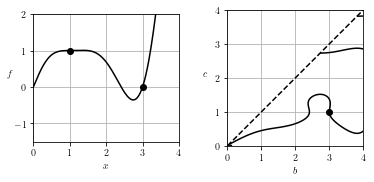

In [17]:
fig = plt.figure(figsize=(6, 2.5))
pretty(F(1, 0), fig=fig)

In [18]:
F3 = F(1, 0, sb=-3)

def lin3(x, bprime=3.2):
    slope = F3.subs(X, bprime)/bprime
    return slope * x

def fig3():
    bmax= b0 + 1
    n = 250
    ylim1 = [-1.5, 1.3]
    xlim1 = [-0.2, 3.5]
    bprime = 3.2
    
    fig = plt.figure(figsize=(6, 2.5))
    gs = plt.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.25)
    ax1 = plt.subplot(gs[0])

    b1d = linspace(xlim1[0], xlim1[1], n)
    f = sympy.lambdify(X, F3)(b1d)
    
    ax1.plot(b1d, f, color='k', lw=lw_main)
    
    setup_axis(ax1, ytickmultiple=0.5)
    
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$f$', rotation=0, labelpad=5)
    ax1.set_xlim(xlim1)
    ax1.set_ylim(ylim1)
    
    ## For reference, other critical points are
    #F3 = F(1, 0)
    #DF = diff(F3, X)
    #list(map(sympy.N, solve(diff(F3, X), X)))
    
    pts = list(map(lambda x: (x, F3.subs(X, x)), [0, c0, b0, bprime]))
    
    vlines(ax1, pts, ylim1[0])

    note(ax1, r"$a_0$", 0, ylim1[0], offsetx=0.05, offsety=0.1)
    note(ax1, r"$c_0$", c0, ylim1[0], offsetx=0.05, offsety=0.1)
    note(ax1, r"$b_0$", b0, ylim1[0], offsetx=-0.25, offsety=0.1)
    note(ax1, r"$b$", bprime, ylim1[0], offsetx=-0.05, offsety=-0.225)
    
    ax1.scatter(*list(zip(*pts)), color='k', s=scatter_size)
    
    ys = lin3(b1d)
    ax1.plot(b1d, ys, color='k', lw=lw_secondary)
    
    
    ax2 = plt.subplot(gs[1])
    DF = diff(F3, X)
    SOLVEME = (F3.subs(X, B) - F3.subs(X, 0))/(B - 0) - DF.subs(X, C)
    b2d, c2d = meshgrid(b1d, b1d)
    solveme = sympy.lambdify((B, C), SOLVEME)(b2d, c2d)
    solveme = ma.array(solveme, mask=c2d>b2d)
    ax2.contour(b2d, c2d, solveme, [0], colors='k')
    
    ax2.plot(b1d, b1d, color='k', lw=lw_secondary)
    ax2.scatter(3, 1, color='k', s=scatter_size)
    note(ax2, r"$(b_0, c_0)$", 3, 1, offsetx=0.1, offsety=0.1)
    
    setup_axis(ax2, showgrid=True)
    ax2.set_xlabel(r'$b$')
    ax2.set_ylabel(r'$c$', rotation=0, labelpad=10)
    
    ax2.fill_between([0,3.5], [0,3.5], 3.5, facecolor='none', hatch="\\\\\\",
                     edgecolor='k', lw=0)
    
    ax2.set_xlim([0, 3.5])
    ax2.set_ylim([0, 3.5])
    
    fig.savefig("figure3.pdf", bbox_inches='tight')

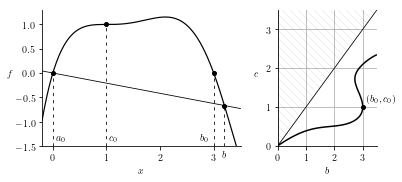

In [19]:
fig3()

In [20]:
F3 = F(1, 0)
DF = diff(F3, X)
list(map(sympy.N, solve(diff(F3, X), X)))

[1.00000000000000,
 -0.24550885056923 + 8.00204054168661e-31*I,
 2.74469991067162 + 4.03749201942158e-30*I,
 3.83956761134118 - 1.72657174630967e-30*I,
 1.36798064107477 - 3.11112432728056e-30*I]

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


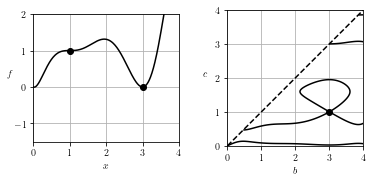

In [21]:
# f''(b) > 0
F_b2neg = F(1, 1, sc=10, sb=10)
fig = plt.figure(figsize=(6, 2.5))
pretty(F_b2neg, fig=fig, n=400)

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


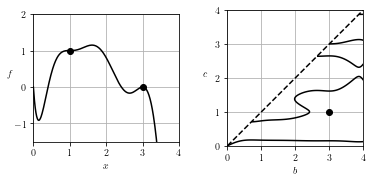

In [22]:
# f''(b) < 0
F_b2pos = F(1, 1, sc=20, sb=-10)
fig = plt.figure(figsize=(6, 2.5))
pretty(F_b2pos, fig=fig, n=400)

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


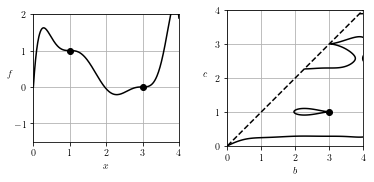

In [23]:
# f''(b) = 0
F_b2zero = F(1, 2, sc=-20, sb=20)
fig = plt.figure(figsize=(6, 2.5))
pretty(F_b2zero, fig=fig, n=400)

In [24]:
def lin4(x, bprime=3.2):
    F3 = F(1, 0)
    slope = F3.subs(X, bprime)/bprime
    return slope * x

def make_subplots(fig, F, subplot1, ptlabel="b?"):
    LABELPAD = 2
    bmax= b0 + 1
    n = 400
    ylim1 = [-1.2, 2.2]
    xlim1 = [-0.2, 3.8]
    subplot2 = subplot1 + 3

    ax1 = fig.add_subplot(2, 3, subplot1)

    b1d = linspace(xlim1[0], xlim1[1], n)
    f = sympy.lambdify(X, F)(b1d)
    
    ax1.plot(b1d, f, color='k', lw=lw_main)
    
    setup_axis(ax1, xtickmultiple=1)
    
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$f$', rotation=0, labelpad=LABELPAD)
    ax1.set_xlim(xlim1)
    ax1.set_ylim(ylim1)
    
    pts = list(map(lambda x: (x, F.subs(X, x)), [0, c0, b0]))
    
    vlines(ax1, pts, ylim1[0])

    note(ax1, r"$a_0$", 0, ylim1[0], offsetx=0.05, offsety=0.05)
    note(ax1, r"$c_0$", c0, ylim1[0], offsetx=0.15, offsety=0.05)
    if subplot1 == 2:
        OFFSETX = -0.4
    else:
        OFFSETX = -0.6
    note(ax1, r"${}$".format(ptlabel), b0, ylim1[0], offsetx=OFFSETX, offsety=0.05)
    
    ax1.scatter(*list(zip(*pts)), color='k', s=scatter_size)
    
    yzeroes = np.zeros_like(b1d)
    ax1.plot(b1d, yzeroes, color='k', lw=lw_secondary)
    ax1.tick_params(axis='both', which='major', labelsize=8)
    
    ax2 = fig.add_subplot(2, 3, subplot2)
    DF = diff(F, X)
    SOLVEME = (F.subs(X, B) - F.subs(X, 0))/(B - 0) - DF.subs(X, C)
    b2d, c2d = meshgrid(b1d, b1d)
    solveme = sympy.lambdify((B, C), SOLVEME)(b2d, c2d)
    solveme = ma.array(solveme, mask=c2d>b2d)
    ax2.contour(b2d, c2d, solveme, [0], colors='k')
    
    ax2.plot(b1d, b1d, color='k', lw=lw_secondary)
    ax2.scatter(3, 1, color='k', s=scatter_size)
    if subplot1 == 1:
        OFFSETY = -0.75
    else:
        OFFSETY = -0.6
    note(ax2, r"$({}, c_0)$".format(ptlabel), 3, 1, offsetx=-0.3, offsety=OFFSETY)
    
    setup_axis(ax2, showgrid=True)
    ax2.set_xlabel(r'$b$')
    ax2.set_ylabel(r'$c$', rotation=0, labelpad=3*LABELPAD)
    
    ax2.fill_between(xlim1, xlim1, xlim1[1], facecolor='none', hatch="\\\\\\",
                     edgecolor='k', lw=0)
    
    ax2.set_xlim(xlim1)
    ax2.set_ylim(xlim1)
    ax2.tick_params(axis='both', which='major', labelsize=8)

    
def fig4():
    bmax= b0 + 1
    n = 400
    ylim1 = [-1.2, 2.2]
    xlim1 = [-0.2, 3.5]

    
    fig = plt.figure(figsize=(6, 4))
    plt.subplots_adjust(wspace=0.3)

    make_subplots(fig, F_b2neg, 1, "b_m")
    make_subplots(fig, F_b2zero, 2, "b_i")
    make_subplots(fig, F_b2pos, 3, "b_M")
    
    fig.savefig("figure4.pdf", bbox_inches='tight')

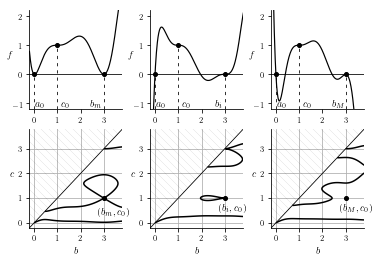

In [25]:
fig4()

In [26]:
def piecewise_plot(x):
    """
    A parabola from (0, 0) to (1, -1). Then a flat line to (2, -1). Then a parabola from
    (2, -1) to (3, 0), and beyond.
    This is illustrative --- let's pretend it's smooth. There is a smooth function
    with these characteristics.
    """
    if x <= 1:
        return (x - 1)*(x - 1) - 1
    elif x <= 2:
        return -1
    else:
        return (x - 2) * (x - 2) - 1

def fig5():
    fig = plt.figure(figsize=(4, 2.5))
    ax = fig.add_subplot(1, 1, 1)
    xlim = [-0.2, 3.8]
    ylim = [-2, 1.98]
    xs = np.linspace(*xlim, 400)
    ys = list(map(piecewise_plot,xs))
    
    setup_axis(ax, showgrid=True)
    
    ax.plot(xs, ys, color='k', lw=lw_main)
    
    a = (0, 0)
    b = (3, 0)
    pts = [a, b]
    vlines(ax, pts, ylim[0])
    
    note(ax, r"$a_0$", 0, ylim[0], offsetx=0.05, offsety=0.1)
    note(ax, r"$b_0$", 3, ylim[0], offsetx=0.05, offsety=0.1)

    ax.scatter(*list(zip(*pts)), color='k', s=scatter_size)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f$', rotation=0, labelpad=3)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    fig.savefig("figure5.pdf", bbox_inches='tight')

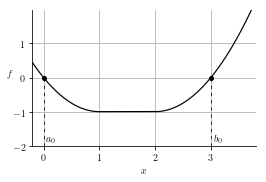

In [27]:
fig5()

In [28]:
# cusp: Ftest = F(5, 2, sc=-3, sb=-3)


<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide


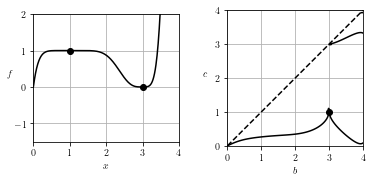

In [29]:
# f''(b) < 0
Ftest = F(5, 2, sc=3, sb=3)
fig = plt.figure(figsize=(6, 2.5))
pretty(Ftest, fig=fig, n=400)